<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

## Table of Content

1. **[Data Preprocessing](#dp)**
2. **[K Nearest Neighbors (KNN)](#knn)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
#pip install pydotplus
# import the functions for visualizing the decision tree
import pydotplus #If this doesnt work please uncomment first line and rerun
from IPython.display import Image  

import random

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [4]:
# load the csv file
df_bank = pd.read_csv('bank.csv')

# display the first five observations
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
1,32,691,10,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,yes
2,45,45,8,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000,no
3,33,400,1,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000,yes
4,47,903,2,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000,yes


In [5]:
# check data types of variables
df_bank.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

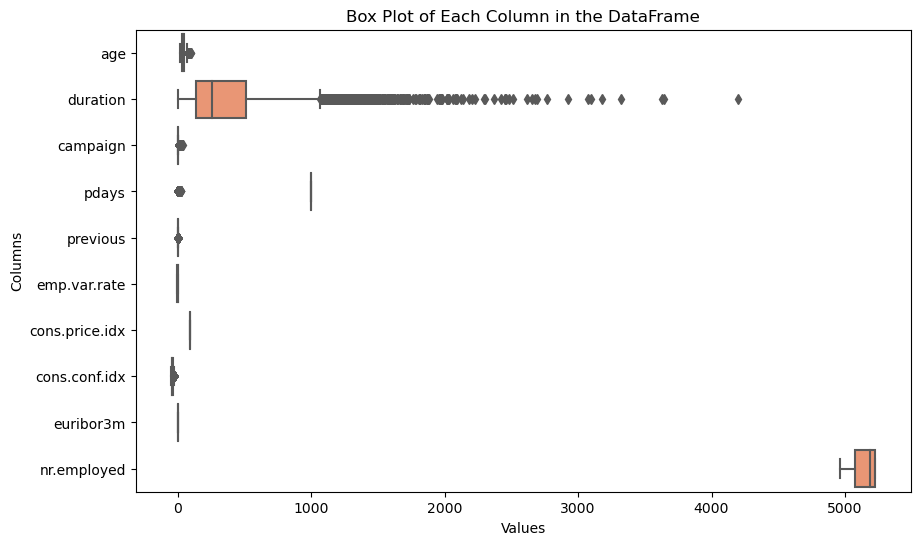

In [6]:
#check for outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bank, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

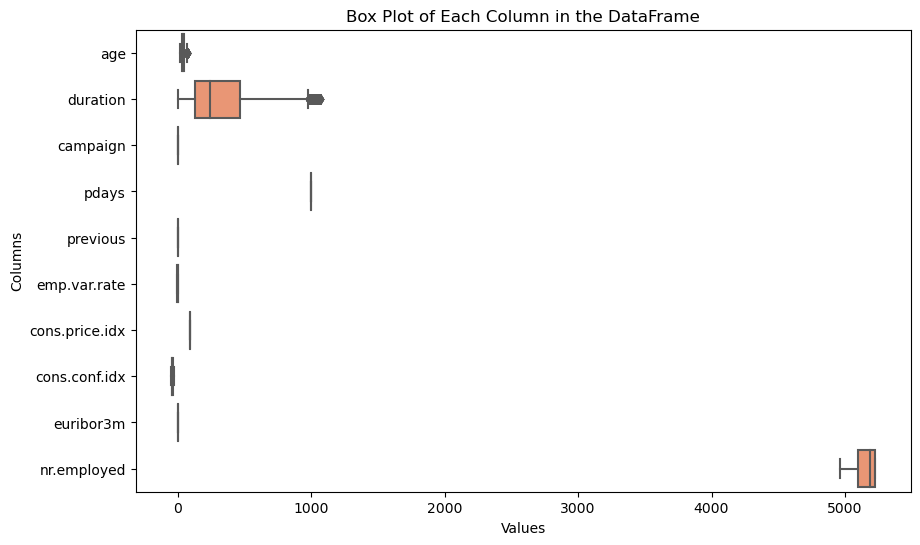

In [7]:
def remove_outliers(df):
    df_clean = df.copy()
    q1 = df_clean.quantile(0.25)
    q3 = df_clean.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    
    df_clean = df_clean[~((df_clean < lower_bound) | (df_clean > upper_bound)).any(axis=1)]
    
    return df_clean
df = remove_outliers(df_bank)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df['y'] = df['y'].replace({'yes': 0, 'no': 1})
X = df.drop(columns = ['y'])
y = df['y']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
X.replace('unknown', np.nan, inplace=True)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000
5,25,243,3,999,0,-1.800000,92.843000,-50.000000,1.531000,5099.100000
6,36,214,1,999,0,-0.100000,93.200000,-42.000000,4.120000,5195.800000
7,43,550,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
8,52,64,1,999,0,1.100000,93.994000,-36.400000,4.855000,5191.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
print(X.isnull().sum())

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
constant_columns = [col for col in X.columns if X[col].nunique() == 1]
X.drop(columns=constant_columns,inplace=True)
X.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,1.100000,93.994000,-36.400000,4.858000,5191.000000
5,25,243,3,-1.800000,92.843000,-50.000000,1.531000,5099.100000
6,36,214,1,-0.100000,93.200000,-42.000000,4.120000,5195.800000
7,43,550,1,1.100000,93.994000,-36.400000,4.857000,5191.000000
8,52,64,1,1.100000,93.994000,-36.400000,4.855000,5191.000000


In [13]:
X['constant'] = 1

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column
X.drop(columns=['constant'],inplace=True)

print("Initial VIF values:")
print(vif_data.sort_values(by='VIF',ascending=False))

Initial VIF values:
          Feature           VIF
8        constant 496010.411975
6       euribor3m     59.368118
7     nr.employed     29.722034
3    emp.var.rate     29.302714
4  cons.price.idx      6.267022
5   cons.conf.idx      2.262587
2        campaign      1.020624
0             age      1.014149
1        duration      1.005444


In [14]:
X.drop(columns=['euribor3m','nr.employed'],inplace=True)
X['constant'] = 1

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column
X.drop(columns=['constant'],inplace=True)

print("Initial VIF values:")
print(vif_data.sort_values(by='VIF',ascending=False))

Initial VIF values:
          Feature          VIF
6        constant 64088.303401
3    emp.var.rate     2.639589
4  cons.price.idx     2.530485
5   cons.conf.idx     1.082459
0             age     1.014112
2        campaign     1.013889
1        duration     1.002627


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 2000x1500 with 0 Axes>

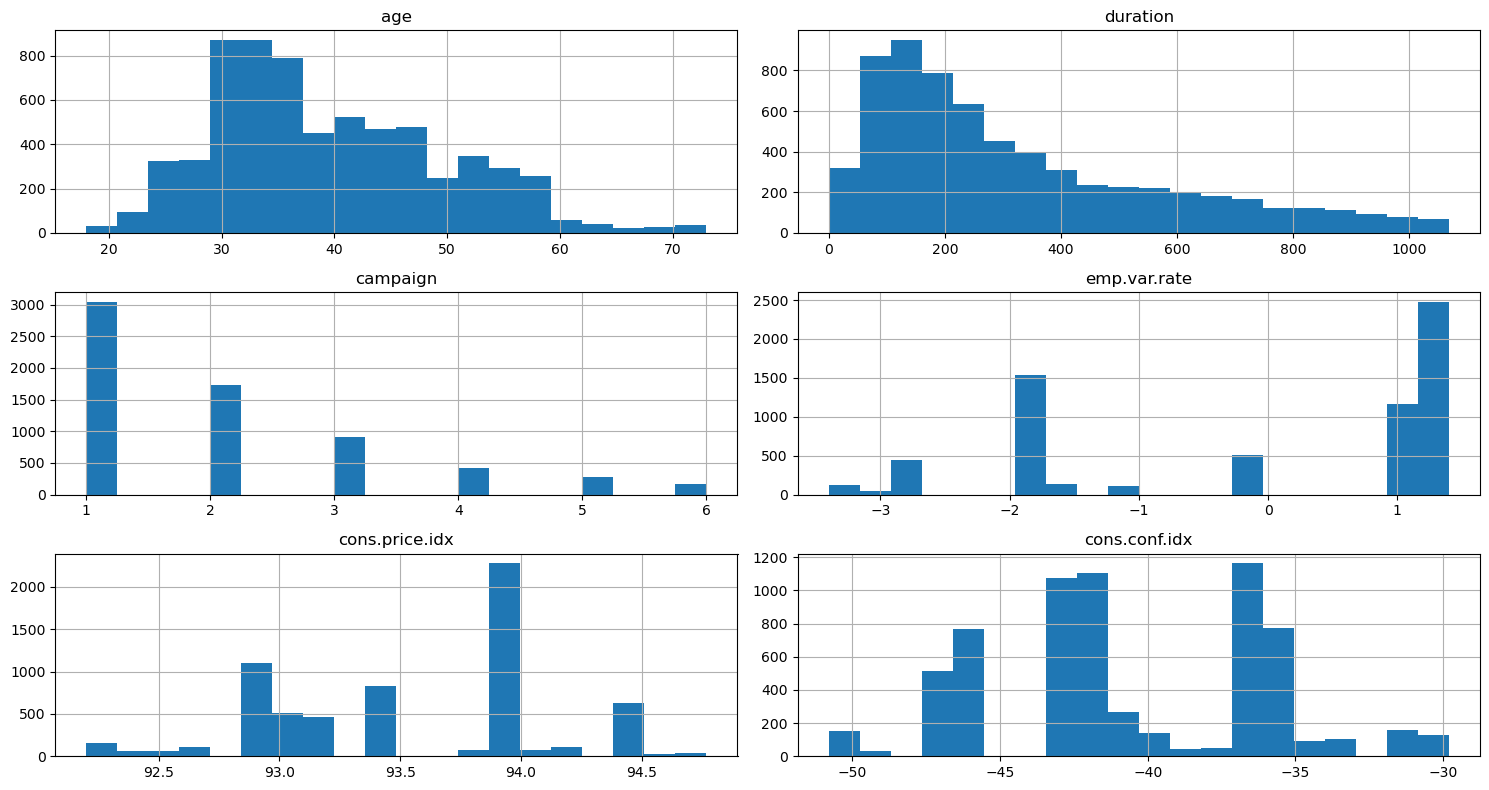

Skewness:
age               0.598601
duration          1.041608
campaign          1.324147
emp.var.rate     -0.575913
cons.price.idx   -0.214375
cons.conf.idx     0.104692
dtype: float64


In [15]:
plt.figure(figsize=(20,15))
X.hist(bins=20)
plt.tight_layout()
plt.show()
print("Skewness:")
print(X.skew())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

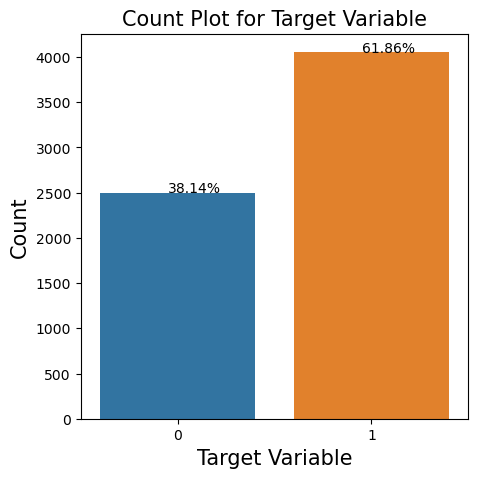

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x = y)

plt.text(x = -0.05, y = y.value_counts()[0] + 1, s = str(round((y.value_counts()[0])*100/len(y),2)) + '%')
plt.text(x = 0.95, y = y.value_counts()[1] +1, s = str(round((y.value_counts()[1])*100/len(y),2)) + '%')

plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx
0,-0.722787,-0.480765,-0.024486,0.701361,0.749298,0.910658
1,-1.410132,-0.330797,0.754670,-1.081276,-1.217928,-2.008221
2,-0.330018,-0.445246,-0.803642,-0.036282,-0.607764,-0.291233
3,0.357326,0.880787,-0.803642,0.701361,0.749298,0.910658
4,1.241055,-1.037225,-0.803642,0.701361,0.749298,0.910658


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:

def plot_conf_matrix(y_test,y_pred,labels=None,title="Confusion Matrix"):
    cm = confusion_matrix(y_test,y_pred,labels=labels)
    plt.figure(figsize=(4,4))
    sns.heatmap(data=cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels,cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actuals")
    plt.title(title)
    plt.show()


def plot_roc_curve(y_test,y_test_prob,title="ROC curve"):
    fpr,tpr,_ = roc_curve(y_test,y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,color='darkorange',label = f"AUC = {auc:.4f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset using euclidean distance to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)

Accuracy of the KNN model: 0.8695652173913043


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

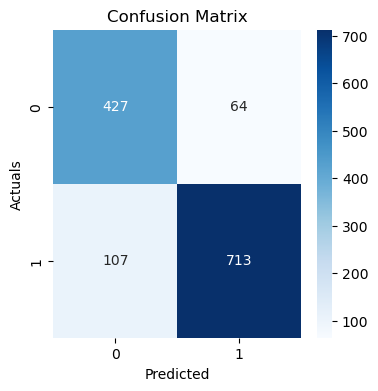

In [23]:
plot_conf_matrix(y_test, y_pred, labels=[0, 1])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
tuned_paramaters = {'n_neighbors': np.arange(1, 31)}

knn_classification = KNeighborsClassifier(metric='euclidean')

knn_grid = GridSearchCV(estimator=knn_classification,param_grid=tuned_paramaters,cv=3,scoring='accuracy')
knn_grid.fit(X_train,y_train)
optimal_k = knn_grid.best_params_['n_neighbors']
print(f"Optimal value of k: {optimal_k}")

Optimal value of k: 18


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
kkn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,metric='euclidean')
kkn_optimal.fit(X_train, y_train)
y_pred = kkn_optimal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model: {accuracy:.4f}")


print(classification_report(y_test, y_pred))


Accuracy of the KNN model: 0.8711
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       491
           1       0.92      0.87      0.89       820

    accuracy                           0.87      1311
   macro avg       0.86      0.87      0.86      1311
weighted avg       0.88      0.87      0.87      1311



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

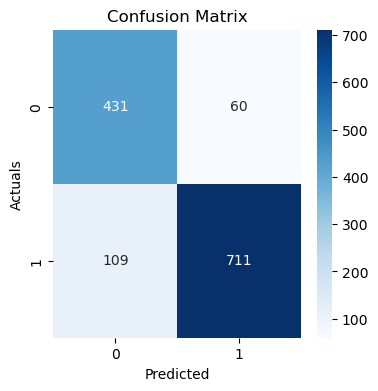

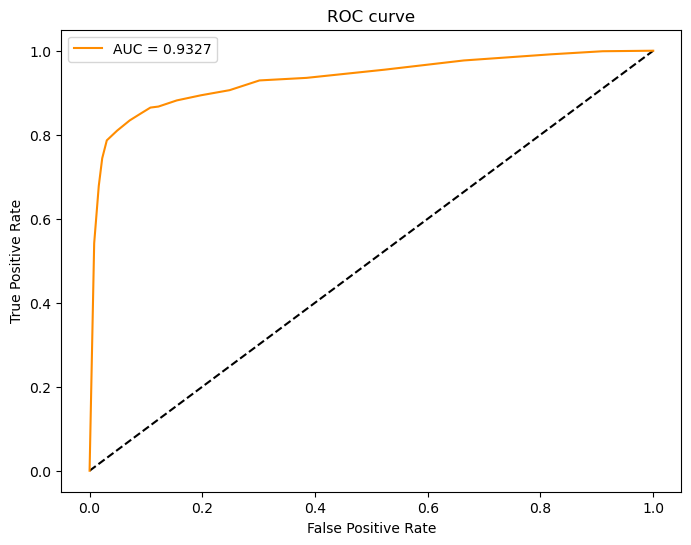

In [26]:
y_pred_prob = kkn_optimal.predict_proba(X_test)[:, 1]

plot_conf_matrix(y_test, y_pred, labels=[0, 1])

plot_roc_curve(y_test, y_pred_prob)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
correctly_classified = (y_test == y_pred).sum()
misclassified = (y_test != y_pred).sum()
total_observations = len(y_test)
correctly_classified_percentage = (correctly_classified / total_observations) * 100
misclassified_percentage = (misclassified / total_observations) * 100

print(f"Percentage of correctly classified observations: {correctly_classified_percentage:.2f}%")
print(f"Percentage of misclassified observations: {misclassified_percentage:.2f}%")

Percentage of correctly classified observations: 87.11%
Percentage of misclassified observations: 12.89%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for distance metric 'euclidean'. Consider only the odd numbers for the 'k' between the range 1 and 25.(Optional)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
k_vals =  [i for i in range(1,25,2)]
k_accuracy = []

for i in k_vals:
    knn_mod = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn_mod.fit(X_train, y_train)
    y_pred = knn_mod.predict(X_test)
    k_accuracy.append(round(accuracy_score(y_test, y_pred),4))


acc_df = pd.DataFrame(zip(k_vals,k_accuracy),columns=["K","Accuracy"])
acc_df

,K,Accuracy
0,1,0.828400
1,3,0.857400
2,5,0.869600
3,7,0.864200
4,9,0.867300
5,11,0.865800
6,13,0.870300
7,15,0.871900
8,17,0.871100
9,19,0.871100


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'. (Optional)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

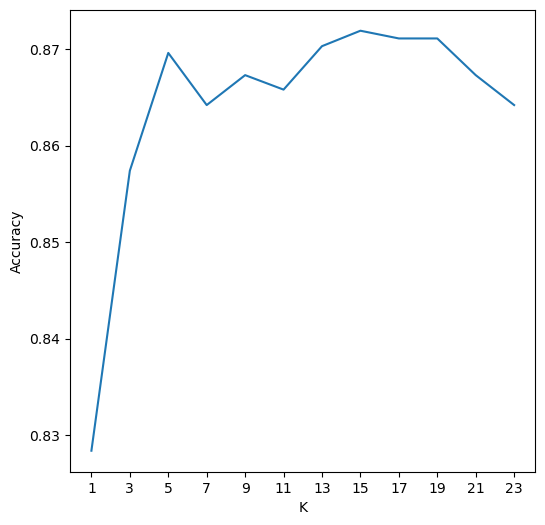

In [29]:
plt.figure(figsize=(6,6))
sns.lineplot(data=acc_df,x="K",y="Accuracy")
plt.xticks(k_vals)
plt.show()